##### 설치

In [19]:
# !python -m pip install tslearn

#### <font color = 'blue'>***사전학습***</font>

    1. Cross_Validation(교차검증)
        > 교차검증은 train_set을 train set + validation_set으로 분리한 뒤 validation set을 사용해 검증하는 방식이다. 

            만약, train_set을 통해 특정 모델을 활용한 학습과정을 거친 뒤, 일괄적으로 동일한 test_set을 통한 반복적 검증을 한다면, 
            특정 Feature Engineering 등을 통해 일괄적으로 모델의 성능은 올릴 수 있겠으나, 과적합(Overfitting)문제가 발생할 수 있으며, 
            추 후 새로운 데이터가 유입될 시 올바른 결과를 낼 수 없다.
<font color = 'red'>***(Regression의 경우 MSE가, Classification의 경우 ER(Error Rate)현저히 다르게 나타날 수 있다는 것이다.)***</font>

    1-1 교차검증의 장점 

        - 모든 데이터셋을 훈련에 활용할 수 있다.
        - 정확도를 향상시킬 수 있다.
        - 데이터 부족으로 인한 underfitting을 방지할 수 있다.
        - 평가에 사용되는 데이터 편중을 막을 수 있다.
        - 평가 결과에 따라 좀 더 일반화된 모델을 만들 수 있다.

    1-2 교차검증의 단점

        - Iteration 횟수가 많기 때문에, 모델 훈련/평가 시간이 오래 걸린다.

    1-3. 교차검증의 종류
        - K-Fold Cross Validation ( k-겹 교차 검증 )
            * cross-validation-splitter
            * Leave-one-out-cross-validation( LOOCV )
            * shuffle-split-cross-validation
        - Stratified K-Fold Cross Validation ( 계층별 k-겹 교차 검증 )    

    2 Grid-Search
        > 매개변수를 튜닝하여 일반화 성능을 개선
        > 가능한 조합들을 시도

    - 간단한 그리드서치 실습

In [2]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

from sklearn.datasets import load_iris
iris = load_iris()

In [3]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=0)
print("훈련 세트의 크기: {} 테스트 세트의 크기: {}".format(X_train.shape[0], X_test.shape[0]))

훈련 세트의 크기: 112 테스트 세트의 크기: 38


In [4]:
best_score = 0
gm = [0.001, 0.01, 0.1, 1, 10, 100]

for gamma in gm:
    for C in gm:
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        score = svm.score(X_test, y_test)
        if score > best_score:
            best_score = score
            best_parameters = {'C' : C, 'gamma' : gamma}

print("최고 점수: {:.2f}".format(best_score))
print("최고 매개변수:", best_parameters)

최고 점수: 0.97
최고 매개변수: {'C': 100, 'gamma': 0.001}


#### <font color = 'blue'>***study_tslearn***</font>

In [5]:
from tslearn.utils import to_time_series_dataset
from sklearn.model_selection import KFold, GridSearchCV
from tslearn.neighbors import KNeighborsTimeSeriesClassifier

In [6]:
my_first_time_series = [1, 3, 4, 2]
my_second_time_series = [1, 2, 4, 2, 1]
# array 를 temporal data로 변경 및 formatted_dataset은 2개의 time series를 내포하고 있음.
formatted_dataset = to_time_series_dataset([my_first_time_series, my_second_time_series])

In [7]:
print(formatted_dataset)

[[[ 1.]
  [ 3.]
  [ 4.]
  [ 2.]
  [nan]]

 [[ 1.]
  [ 2.]
  [ 4.]
  [ 2.]
  [ 1.]]]


In [8]:
print(formatted_dataset.shape)

(2, 5, 1)


***represented through a three dimenssional numpy array of shape (n,T,d)***

  - n : number of time seriese
  - T : length
  - d : dimentionality

    * 즉 2개의 Temporal data가 5개의 sample 길이 및 1개의 차원으로 구성되어 져있다고 위 데이터셋을 설명할 수 있다.

***Note***

    - scikit-learn’s pipelines and model-selection tools can be used in conjunction with tslearn transformers and estimators

In [9]:
from sklearn.model_selection import KFold, GridSearchCV
from tslearn.neighbors import KNeighborsTimeSeriesClassifier

***코드 예시***

In [12]:
knn = KNeighborsTimeSeriesClassifier(metric="dtw")
p_grid = {"n_neighbors" : [1, 5]}
cv = KFold(n_splits=2, shuffle=True, random_state=0)
clf = GridSearchCV(estimator=knn, param_grid=p_grid, cv=cv)
clf.fit(X, y)

In [13]:
from tslearn.clustering import TimeSeriesKMeans
from tslearn.datasets import CachedDatasets

C:\ProgramData\Anaconda3\lib\site-packages\tslearn\clustering\kmeans.py:16: UserWarning: Scikit-learn <0.24 will be deprecated in a future release of tslearn
  warnings.warn(


In [14]:
X_train = CachedDatasets().load_dataset('Trace')[0]

In [15]:
euclidean_params = {'metric':'euclidean'}
dba_params = {'metric':'dtw'}
sdtw_params = {'metric':'softdtw', 'metric_params':{'gamma':.01}}

y_preds = []

for params in (euclidean_params, dba_params, sdtw_params):
    km = TimeSeriesKMeans(n_clusters=3, random_state=0, **params)
    y_preds.append(km.fit_predict(X_train))

***Time series clustering with kmeans***

In [16]:
import pandas as pd
import numpy
import matplotlib.pyplot as plt

from tslearn.clustering import TimeSeriesKMeans
from tslearn.datasets import CachedDatasets
from tslearn.preprocessing import TimeSeriesScalerMeanVariance, TimeSeriesResampler

In [20]:
#  make df
col_name = ['X_train', 'y_train', 'X_test', 'y_test']
df = pd.DataFrame()
idx = 0
for name in col_name:
    df[name] = CachedDatasets().load_dataset("Trace")[idx].tolist()
    idx  += 1
display(df.tail())

,X_train,y_train,X_test,y_test
95,"[[0.60653], [0.62571], [0.63304], [0.62139], [...",1,"[[-1.3711], [-1.4013], [-1.3609], [-1.3611], [...",3
96,"[[0.74781], [0.76297], [0.73012], [0.68065], [...",2,"[[0.71322], [0.6937], [0.66858], [0.70954], [0...",2
97,"[[-1.2657], [-1.2381], [-1.2569], [-1.264], [-...",4,"[[0.80689], [0.81192], [0.8078], [0.84308], [0...",2
98,"[[0.67424], [0.6995], [0.72477], [0.73695], [0...",1,"[[-1.9341], [-1.9663], [-1.9511], [-1.9852], [...",3
99,"[[0.76816], [0.71678], [0.76064], [0.77676], [...",2,"[[-1.4311], [-1.455], [-1.4689], [-1.4196], [-...",4


In [21]:
seed = 0
numpy.random.seed(seed)
X_train, y_train, X_test, y_test = CachedDatasets().load_dataset("Trace")
X_train_compare = X_train.copy()
X_train = X_train[y_train < 4]  
numpy.random.shuffle(X_train)

X_train = TimeSeriesScalerMeanVariance().fit_transform(X_train[:50])
X_train = TimeSeriesResampler(sz=40).fit_transform(X_train)
sz = X_train.shape[1]

    - TimeSeriesScalerMeanVariance
    - TimeSeriesResampler
        > 위 두 과정을 통해 Vriance는 4*-1 to 4로, Domain t는 40 size로 Scaling 및 Resampling 되었다.

***본문참고***

https://tslearn.readthedocs.io/en/stable/auto_examples/clustering/plot_kmeans.html#sphx-glr-auto-examples-clustering-plot-kmeans-py

'''
time series are preprocessed using TimeSeriesScalerMeanVariance.
This scaler is such that each output time series has zero mean and unit variance. The assumption here is that the range of a given time series is uninformative and one only wants to compare shapes in an amplitude-invariant manner (when time series are multivariate, this also rescales all modalities such that there will not be a single modality responsible for a large part of the variance). This means that one cannot scale barycenters back to data range because each time series is scaled independently and there is hence no such thing as an overall data range.
'''
\
\
'''
***시계열 데이터를 TimeSeriesScalerMeanVariance를 통하여 전처리를 시행한다.
위 스케일러는 평균 0 및 단위분산으로 조정되 데이터를 출력하도록 한다.
이는 주어진 시간역의 본 범주를 고려하지 않은다는 점, 그리고 단지 진폭의 유사성을 기준하여 비교를 목적의 스케일링임을 의미한다.***

***각 시계열이 독립적으로 취급되며, K-means model에서 각 군집화를 위해 지정하는 군집의 중심은 축소된 범위 안에서의 중심을 통해 군집화 된 이유로 중심을 본 데이터 범위로 다시 확장 할 수는 없다.***
'''

Euclidean k-means
16.434 --> 9.437 --> 9.437 --> 


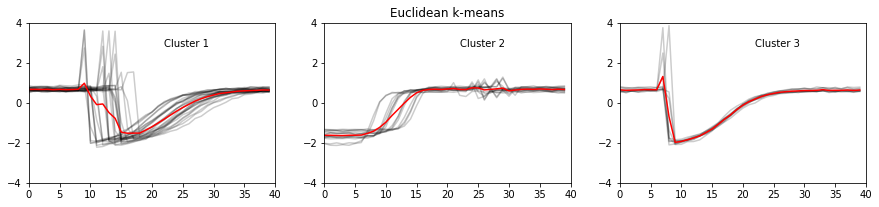

In [22]:
print("Euclidean k-means")
km = TimeSeriesKMeans(n_clusters=3, verbose=True, random_state=seed)
y_pred = km.fit_predict(X_train)

plt.figure(figsize = (15, 10))
for yi in range(3):
    plt.subplot(3, 3, yi + 1)
    for xx in X_train[y_pred == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(km.cluster_centers_[yi].ravel(), "r-")
    plt.xlim(0, sz)
    plt.ylim(-4, 4)
    plt.text(0.55, 0.85,'Cluster %d' % (yi + 1),
             transform=plt.gca().transAxes)
    if yi == 1:
        plt.title("Euclidean k-means")

In [23]:
dba_km = TimeSeriesKMeans(n_clusters=3,
                          n_init=2,
                          metric="dtw",
                          verbose=True,
                          max_iter_barycenter=10,
                          random_state=seed)
y_pred = dba_km.fit_predict(X_train)

Init 1
0.637 --> 0.458 --> 0.458 --> 
Init 2


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

0.826 --> 0.525 --> 0.477 --> 0.472 --> 0.472 --> 


[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.0s finished


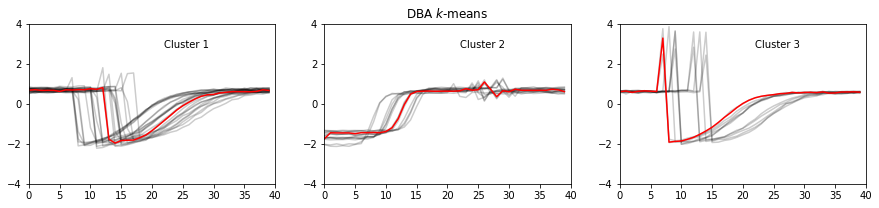

In [24]:
plt.figure(figsize = (15, 10))
for yi in range(3):
    plt.subplot(3, 3, 4 + yi)
    for xx in X_train[y_pred == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(dba_km.cluster_centers_[yi].ravel(), "r-")
    plt.xlim(0, sz)
    plt.ylim(-4, 4)
    plt.text(0.55, 0.85,'Cluster %d' % (yi + 1),
             transform=plt.gca().transAxes)
    if yi == 1:
        plt.title("DBA $k$-means")

In [25]:
# Soft-DTW-k-means
print("Soft-DTW k-means")
sdtw_km = TimeSeriesKMeans(n_clusters=3,
                           metric="softdtw",
                           metric_params={"gamma": .01},
                           verbose=True,
                           random_state=seed)
y_pred = sdtw_km.fit_predict(X_train)

Soft-DTW k-means
0.472 --> 0.144 --> 0.142 --> 0.143 --> 0.142 --> 0.143 --> 0.142 --> 0.143 --> 0.142 --> 0.142 --> 0.142 --> 0.142 --> 0.142 --> 0.142 --> 0.142 --> 0.142 --> 0.142 --> 0.142 --> 0.142 --> 0.142 --> 0.142 --> 


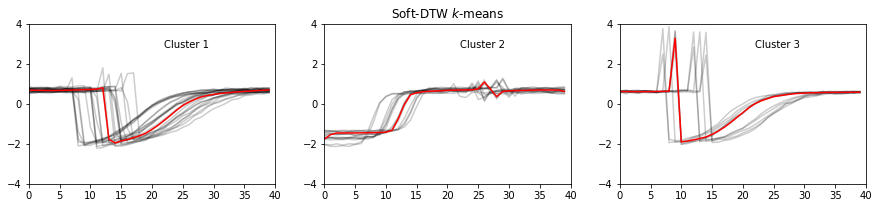

In [26]:
plt.figure(figsize = (15, 10))
for yi in range(3):
    plt.subplot(3, 3, 7 + yi)
    for xx in X_train[y_pred == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(sdtw_km.cluster_centers_[yi].ravel(), "r-")
    plt.xlim(0, sz)
    plt.ylim(-4, 4)
    plt.text(0.55, 0.85,'Cluster %d' % (yi + 1),
             transform=plt.gca().transAxes)
    if yi == 1:
        plt.title("Soft-DTW $k$-means")